In [ ]:
#https://www.kaggle.com/code/astakalaswapnil/pneumonia-detection

# Accessed Google Drive from Google Colab using below command
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  



Mounted at /content/drive


In [ ]:
#uploaded kaggle.json file to access the dataset which is avialabe on Kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manishasasatte","key":"6b133861c076d283e42f7115bced8795"}'}

In [ ]:
 #Make a directory !rm -r ~/.kaggle
!mkdir ~/.kaggle
# compy the kaggle.json file to the folder created
!cp kaggle.json ~/.kaggle/

#chmod 600 command sets the permissions for the Kaggle API token file kaggle.json to 600
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloaded pneumonia-xray-images.zip to /content folder of my drive

! kaggle datasets download -d pcbreviglieri/pneumonia-xray-images

 99% 1.13G/1.14G [00:13<00:00, 80.3MB/s]
100% 1.14G/1.14G [00:13<00:00, 93.1MB/s]


In [ ]:
 # unzip pneumonia-xray-images.zip to /content/pneumonia_images folder of my drive
 !unzip /content/pneumonia-xray-images.zip -d /content/pneumonia_images
 

Streaming output truncated to the last 5000 lines.
  inflating: /content/pneumonia_images/train/normal/IM-0435-0001-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0435-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0437-0001-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0437-0001-0002.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0437-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0438-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0439-0001-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0439-0001-0002.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0439-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0440-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0441-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0442-0001.jpeg  
  inflating: /content/pneumonia_images/train/normal/IM-0444-

In [ ]:
import numpy as np             
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import os 
#The Python os.rename() function allows us to rename a file or directory straight from the command line or an IDE.
os.rename('/content/pneumonia_images/test/opacity','/content/pneumonia_images/test/pneumonia')
os.rename('/content/pneumonia_images/train/opacity','/content/pneumonia_images/train/pneumonia')
os.rename('/content/pneumonia_images/val/opacity','/content/pneumonia_images/val/pneumonia')



In [16]:
train_path = '/content/pneumonia_images/train'
test_path = '/content/pneumonia_images/test'
valid_path = '/content/pneumonia_images/val'

batch_size = 32
img_height = 224
img_width = 224

In [17]:
from PIL import Image
# Open the image
image = Image.open("/content/pneumonia_images/test/pneumonia/person101_bacteria_484.jpeg")
# Get the size of the image
width, height = image.size
# Print the size of the image
print(f"The size of the image is {width} x {height} pixels.")



The size of the image is 1064 x 840 pixels.


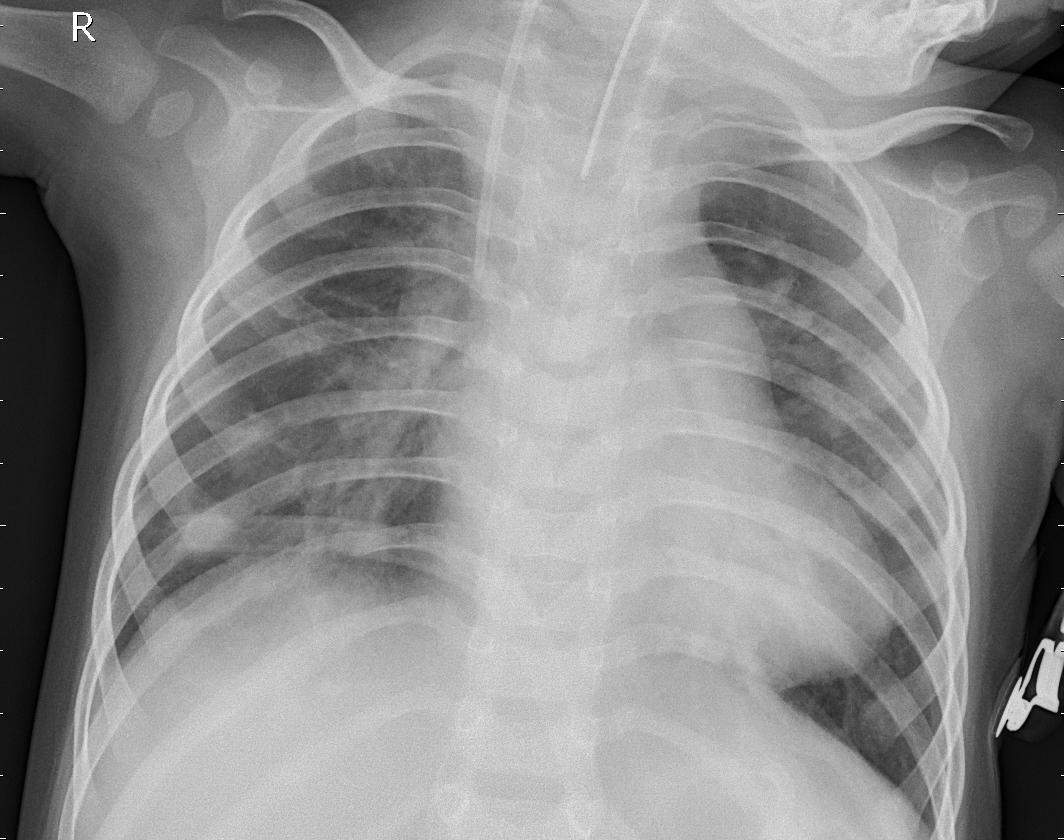

In [18]:

# Open the image
image = Image.open("/content/pneumonia_images/test/pneumonia/person101_bacteria_484.jpeg")

# Show the image
image.show()






In [ ]:

# Open the NORMAL image
image = Image.open("/content/pneumonia_images/train/normal/IM-0119-0001.jpeg")

# Get the size of the image
width, height = image.size

# Print the size of the image
print(f"The size of the image is {width} x {height} pixels.")

The size of the image is 1810 x 1434 pixels.


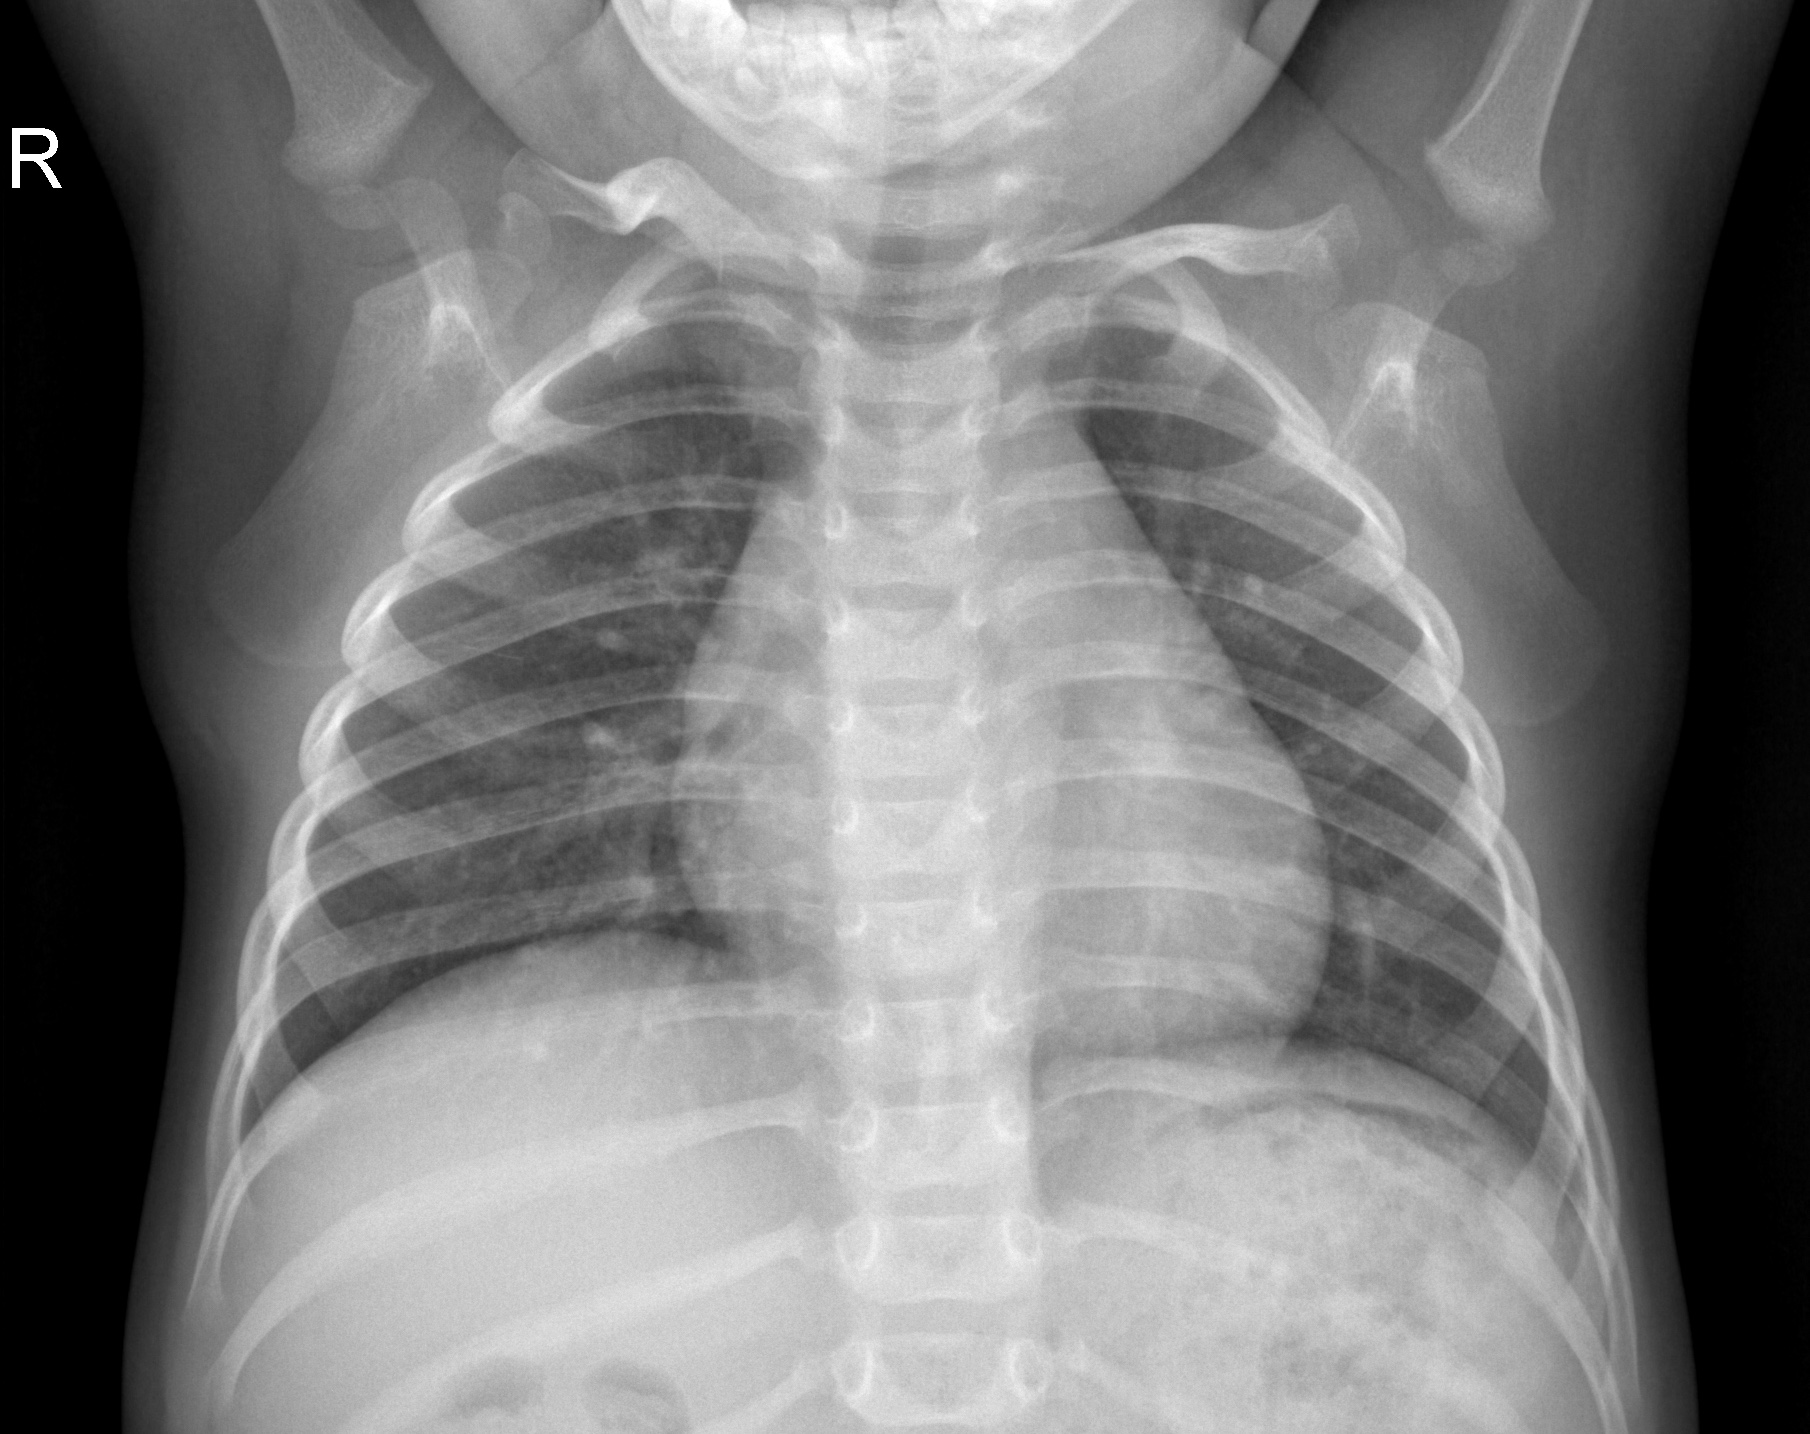

In [ ]:
import cv2
# Open the image
image = Image.open("/content/pneumonia_images/train/normal/IM-0119-0001.jpeg")

# Define the label
label = 'NORMAL CASE'



image.show()



In [ ]:
DETECTION_CLASSES = ('Normal', 'Opacity')


In [ ]:
! pip install texttable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#installed ( ! pip install texttable)
# counting the number of images for every dataset and the associated two classes (Normal and Pneumonia)
import texttable as tt 
import os

def count_images(directory_name, detection_class):
    return len(os.listdir(directory_name + detection_class))


t = tt.Texttable()

t.add_rows([['Dataset Type', '/Normal', '/Opacity'], 
            ['Training', count_images(train_path, '/normal'), count_images(train_path, '/opacity')], 
            ['Test', count_images(test_path, '/normal'), count_images(test_path, '/opacity')],
            ['Validation', count_images(valid_path, '/normal'), count_images(valid_path, '/opacity')]
           ])
print(t.draw())

+--------------+---------+----------+
| Dataset Type | /Normal | /Opacity |
+==============+=========+==========+
| Training     | 1082    | 3110     |
+--------------+---------+----------+
| Test         | 234     | 390      |
+--------------+---------+----------+
| Validation   | 267     | 773      |
+--------------+---------+----------+


In [ ]:
# specify the path to your image dataset
dataset_path = '/path/to/your/dataset'

# count the number of images in the dataset
num_images = len(os.listdir(dataset_path))

In [ ]:
print(t)

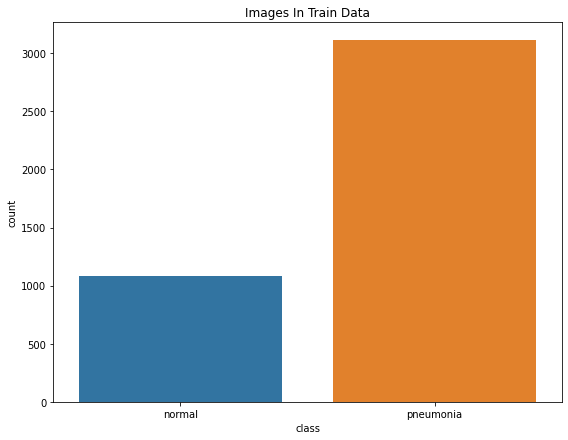

In [19]:
## count number of images in each class for training data
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(train_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(train_path,os.listdir(train_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
g=sns.barplot(x='class', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.title('Images In Train Data')
plt.show()

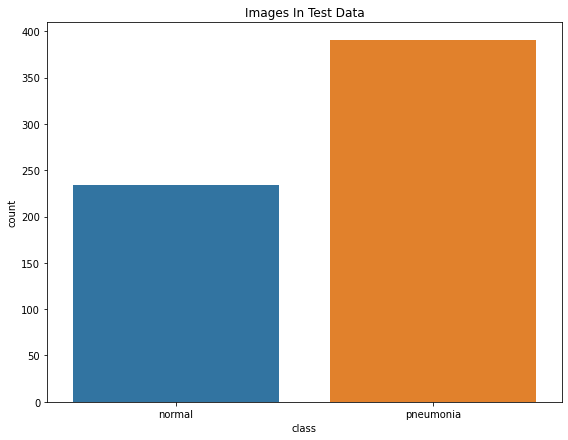

In [20]:
## count number of images in each class for testing data
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(test_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(test_path,os.listdir(test_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
g=sns.barplot(x='class', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.title('Images In Test Data')
plt.show()

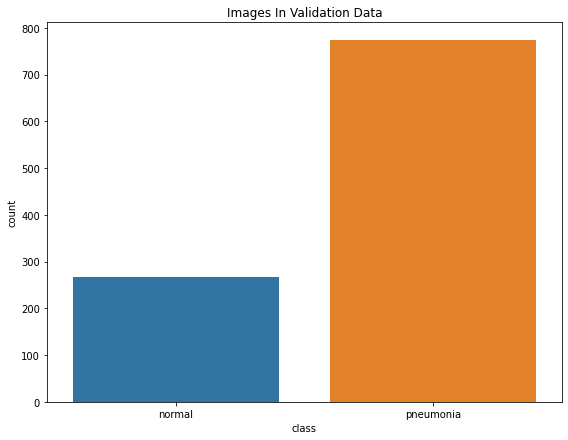

In [21]:
## count number of images in each class for val data
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(valid_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(valid_path,os.listdir(valid_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
g=sns.barplot(x='class', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.title('Images In Validation Data')
plt.show()

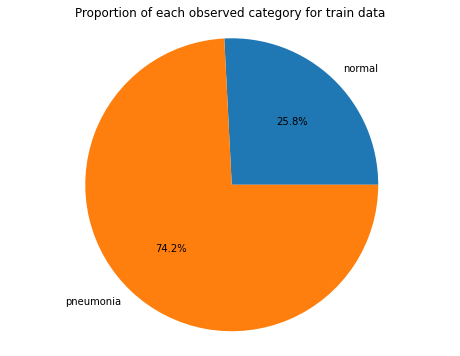

In [22]:
# Proportion of each observed category for train data
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(train_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(train_path,os.listdir(train_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.pie(DF['count'],
        labels=DF['class'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category for train data')
plt.show()

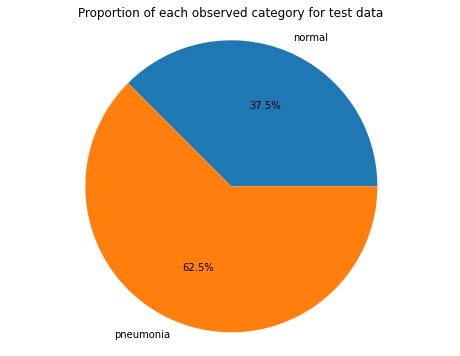

In [23]:
# Proportion of each observed category for testing data
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(test_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(test_path,os.listdir(test_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.pie(DF['count'],
        labels=DF['class'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category for test data')
plt.show()


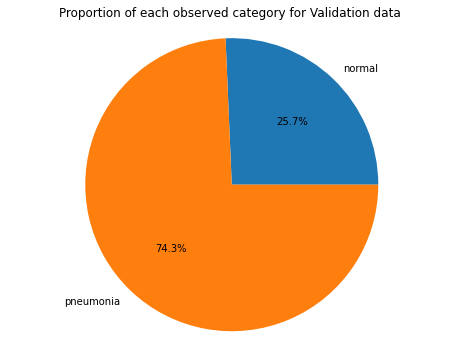

In [24]:
## Proportion of each observed category for Validation data
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(valid_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(valid_path,os.listdir(valid_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.pie(DF['count'],
        labels=DF['class'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category for Validation data')
plt.show()



In [ ]:

#Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
      class_mode='binary',
      batch_size=batch_size
      )

valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 4192 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


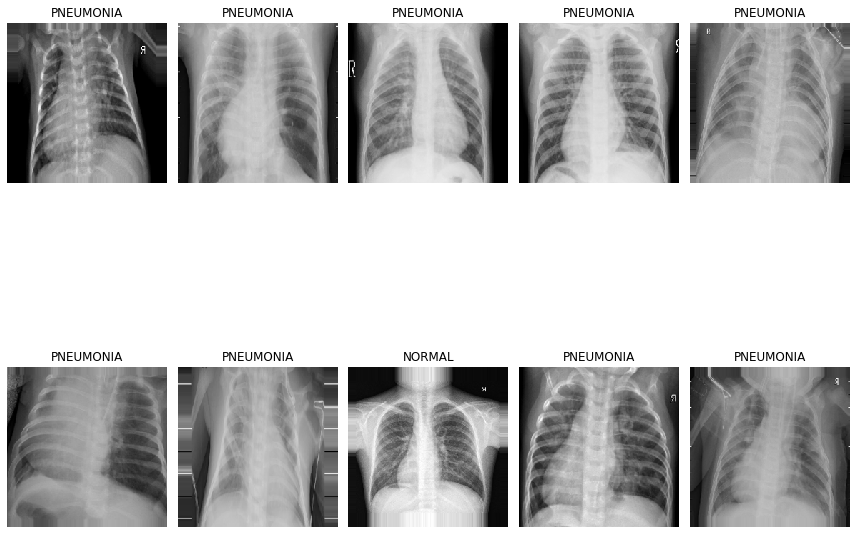

In [ ]:
# Plot Normal and PNEUMONIA images 
plt.figure(figsize=(12, 12))

for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
        
plt.tight_layout()
plt.show()

In [ ]:
print(image.size)

150528


In [ ]:
# printing the assigned indices for sanity check
print(f'class indices:  {train.class_indices}')

class indices:  {'normal': 0, 'opacity': 1}


In [ ]:
# Model-1: Convolutional Neural Network
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

CNN_Model=Sequential()

#Image Feature Extraction:(Block: 1 - Block: 3)
#Block-1
CNN_Model.add(layers.Conv2D(16, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-2
CNN_Model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-3
CNN_Model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Final Layer(Classification/prediction)
CNN_Model.add(layers.Flatten())
CNN_Model.add(layers.Dense(activation = 'relu', units = 128))
CNN_Model.add(layers.Dense(activation = 'relu', units = 64))
CNN_Model.add(layers.Dense(activation = 'sigmoid', units = 1))
CNN_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# get CNN model summary
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [ ]:
from tensorflow.keras.utils import plot_model 
plot_model(CNN_Model, to_file='/content/CNN_Model.jpeg', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='/content/CNN_Model.jpeg')

TypeError: ignored

In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
                               'balanced', 
                               classes=np.unique(train.classes), 
                               y=train.classes
                               )
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 1.9371534195933457, 1: 0.6739549839228296}


In [ ]:
# Fit the CNN model
#CNN_Model_history= CNN_Model.fit(train, epochs=50, validation_data=valid, class_weight=cw, callbacks=callbacks_list)


CNN_Model.fit(train, epochs=50, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/50
131/131 [==============================] - 344s 3s/step - loss: 0.5494 - accuracy: 0.5935 - val_loss: 0.3016 - val_accuracy: 0.8837 - lr: 0.0010
Epoch 2/50
131/131 [==============================] - 321s 2s/step - loss: 0.2555 - accuracy: 0.8857 - val_loss: 0.1986 - val_accuracy: 0.9337 - lr: 0.0010
Epoch 3/50
131/131 [==============================] - 339s 3s/step - loss: 0.1957 - accuracy: 0.9163 - val_loss: 0.2760 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 4/50
131/131 [==============================] - 344s 3s/step - loss: 0.1918 - accuracy: 0.9196 - val_loss: 0.1831 - val_accuracy: 0.9279 - lr: 0.0010
Epoch 5/50
131/131 [==============================] - 317s 2s/step - loss: 0.1838 - accuracy: 0.9265 - val_loss: 0.3181 - val_accuracy: 0.8808 - lr: 0.0010
Epoch 6/50
131/131 [==============================] - 338s 3s/step - loss: 0.1634 - accuracy: 0.9315 - val_loss: 0.1608 - val_accuracy: 0.9462 - lr: 0.0010
Epoch 7/50
131/131 [==============================] - 331s 3s/st

<AxesSubplot:>

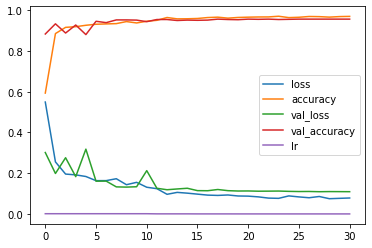

In [ ]:
pd.DataFrame(CNN_Model.history.history).plot()


In [ ]:
# try this  one more try for Loss  and accuracy for Training and Validation
 
# draw_learning_curve(CNN_Model_history)

In [ ]:
# Loss  and accuracy for Training and Validation 

pd.DataFrame(CNN_Model.history.history).plot()
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix for CNN Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

TypeError: ignored

In [ ]:

#plt.title(" Loss  and accuracy for Training and Validation ")
pd.DataFrame(CNN_Model.history.history).plot()

TypeError: ignored

In [ ]:
# Check the accuracy of CNN model

test_accu_CNN = CNN_Model.evaluate(test)
print('The testing accuracy is :',test_accu_CNN[1]*100, '%')

20/20 [==============================] - 16s 763ms/step - loss: 0.2338 - accuracy: 0.9247
The testing accuracy is : 92.46794581413269 %


In [ ]:
#Predicted values 
preds = CNN_Model.predict(test,verbose=1)

20/20 [==============================] - 19s 916ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<AxesSubplot:>

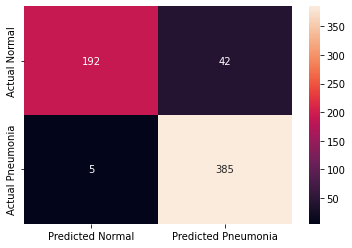

In [ ]:
# Confusion Matrix for CNN Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")


In [ ]:
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])


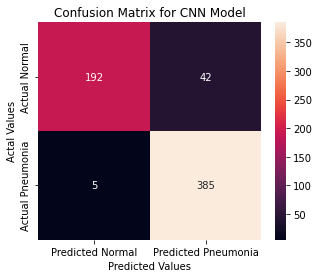

In [ ]:
#Plotting the confusion matrix for CNN
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt="d")
plt.title('Confusion Matrix for CNN Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# CNN Precision Report
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))



              precision    recall  f1-score   support

      NORMAL       0.97      0.82      0.89       234
   PNEUMONIA       0.90      0.99      0.94       390

    accuracy                           0.92       624
   macro avg       0.94      0.90      0.92       624
weighted avg       0.93      0.92      0.92       624



In [ ]:
# ROC AUC FOR CNN
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test.classes, predictions)
print(f'ROC AUC (Test Dataset) {auc:.2}')

ROC AUC (Test Dataset) 0.9


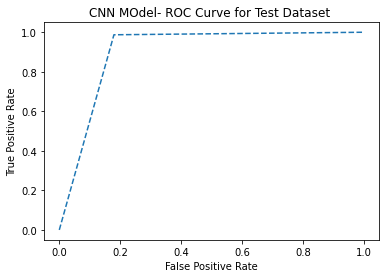

In [ ]:
# calculate roc curves
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test.classes, predictions)

# plot the roc curve for the model
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN MOdel- ROC Curve for Test Dataset ')
plt.show()

(624, 224, 224, 3)
(624,)


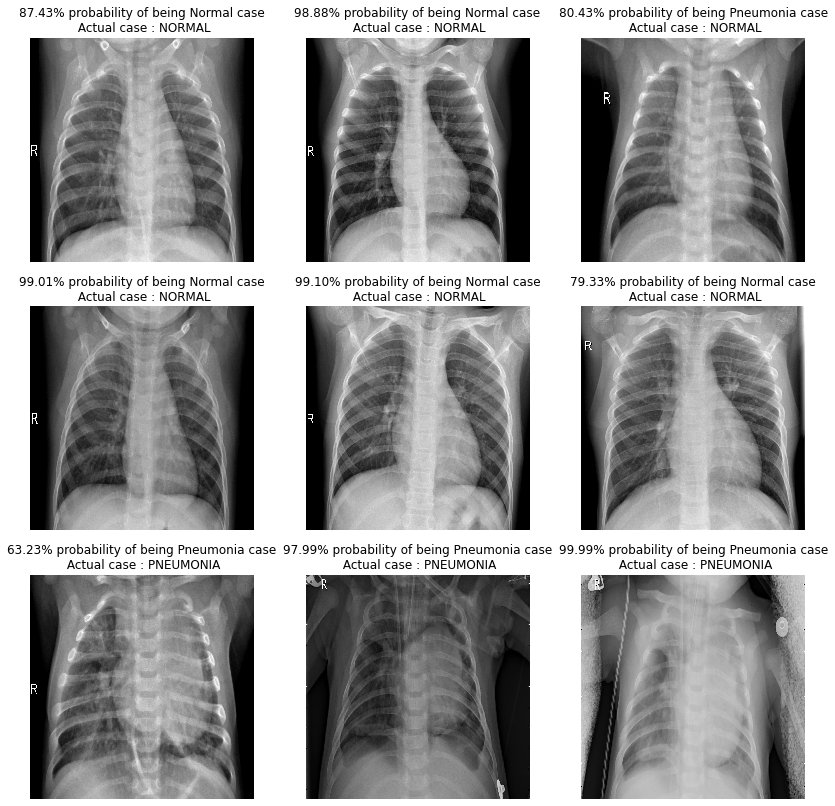

In [ ]:
# CORRECTLY PREDICTED VALUES FOR TEST DATA

test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [ ]:

# Model-2: Transfer Learning (TL_Model)

base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
    include_top=False)
base_model.trainable = False

def get_pretrained():
    inputs = layers.Input(shape=(img_height, img_width, 3))
    x = base_model(inputs)
    
    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
   
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model      

234545216/234545216 [==============================] - 3s 0us/step


In [ ]:
keras.backend.clear_session()

TL_Model = get_pretrained()
TL_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TL_Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                             

In [ ]:
from tensorflow.keras.utils import plot_model 
plot_model(TL_Model, to_file='/content/TL_Model.jpeg', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='/content/TL_Model.jpeg')

TypeError: ignored

In [ ]:
#Fit The Model
TL_Model.fit(train,epochs=50, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/50
131/131 [==============================] - 2388s 18s/step - loss: 0.2387 - accuracy: 0.8998 - val_loss: 0.3767 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 2/50
131/131 [==============================] - 2236s 17s/step - loss: 0.1509 - accuracy: 0.9442 - val_loss: 0.1359 - val_accuracy: 0.9596 - lr: 0.0010
Epoch 3/50
131/131 [==============================] - 2246s 17s/step - loss: 0.1267 - accuracy: 0.9504 - val_loss: 0.1642 - val_accuracy: 0.9452 - lr: 0.0010
Epoch 4/50
131/131 [==============================] - ETA: 0s - loss: 0.1322 - accuracy: 0.9492 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
131/131 [==============================] - 2233s 17s/step - loss: 0.1322 - accuracy: 0.9492 - val_loss: 0.1739 - val_accuracy: 0.9317 - lr: 0.0010
Epoch 5/50
131/131 [==============================] - 2202s 17s/step - loss: 0.1029 - accuracy: 0.9590 - val_loss: 0.1252 - val_accuracy: 0.9577 - lr: 3.0000e-04
Epoch 6/50
131/131 [========================

<AxesSubplot:>

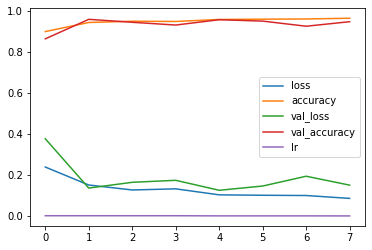

In [ ]:
pd.DataFrame(TL_Model.history.history).plot()

In [ ]:
test_accu_TL = TL_Model.evaluate(test)
print('The testing accuracy is :',test_accu_TL[1]*100, '%')

20/20 [==============================] - 321s 16s/step - loss: 0.2466 - accuracy: 0.9151
The testing accuracy is : 91.50640964508057 %


In [ ]:
TL_preds = TL_Model.predict(test,verbose=1)

20/20 [==============================] - 270s 13s/step


In [ ]:
TL_preds = TL_preds.copy()
TL_preds[TL_preds <= 0.5] = 0
TL_preds[TL_preds > 0.5] = 1

In [ ]:
TL_cm = pd.DataFrame(data=confusion_matrix(test.classes, TL_preds, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])


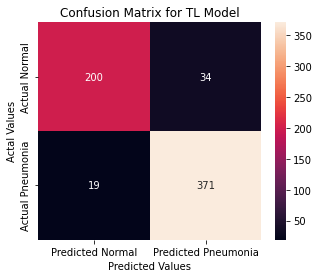

In [ ]:
#Plotting the confusion matrix for TL
plt.figure(figsize=(5,4))
sns.heatmap(TL_cm,annot=True,fmt="d")
plt.title('Confusion Matrix for TL Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print("------TL_Model---------")
print(classification_report(y_true=test.classes,y_pred=TL_preds,target_names =['NORMAL','PNEUMONIA']))

------TL_Model---------
              precision    recall  f1-score   support

      NORMAL       0.91      0.85      0.88       234
   PNEUMONIA       0.92      0.95      0.93       390

    accuracy                           0.92       624
   macro avg       0.91      0.90      0.91       624
weighted avg       0.91      0.92      0.91       624



In [ ]:
# ROC AUC FOR TL
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test.classes, TL_preds)
print(f'ROC AUC (Test Dataset) {auc:.2}')

ROC AUC (Test Dataset) 0.9


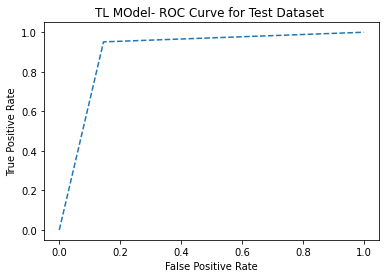

In [ ]:
# calculate roc curves
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test.classes, TL_preds)

# plot the roc curve for the TL model
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TL MOdel- ROC Curve for Test Dataset ')
plt.show()

(624, 224, 224, 3)
(624,)


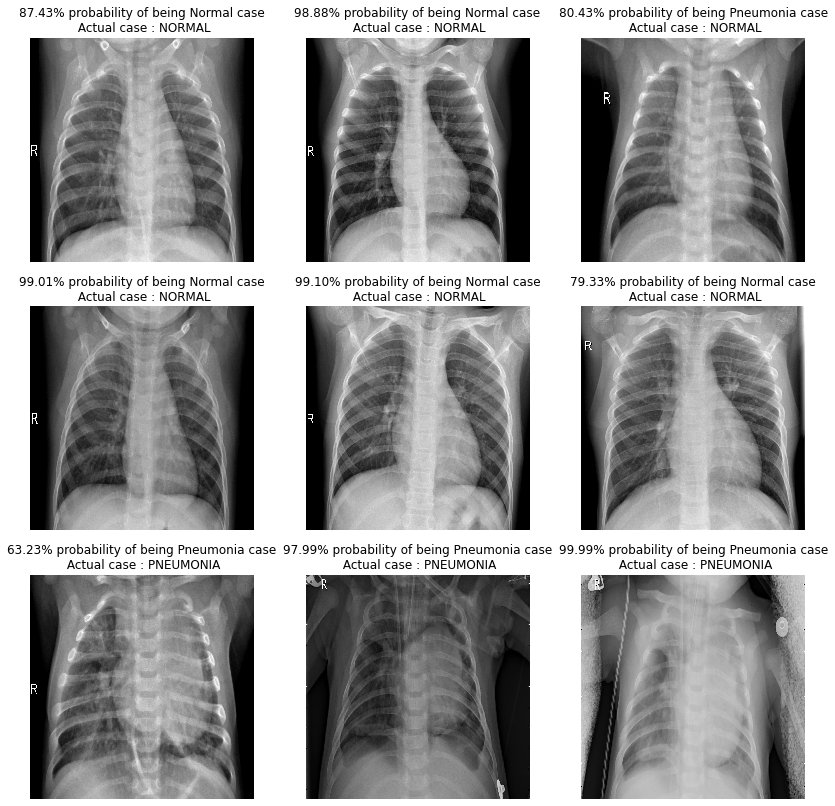

In [ ]:
# TL model predicted corretly on test data
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if TL_preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(TL_preds[i][0]))    
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-TL_preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [ ]:
# Accuracy of Model-1 (CNN model from Scratch), Model-2 (TF) and Model-3 (FT)

print('1. The testing accuracy of Model-1 (CNN model from Scratch) is :',test_accu_CNN[1]*100, '%')
print('2. The testing accuracy of Model-2 (Transfer Learning) is :',test_accu_TL[1]*100, '%')


1. The testing accuracy of Model-1 (CNN model from Scratch) is : 92.46794581413269 %
2. The testing accuracy of Model-2 (Transfer Learning) is : 91.50640964508057 %


In [ ]:
#  Convolutional Neural Network tried After chenging optimized SGD the parameters 
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

CNN_Model_SGD=Sequential()

#Image Feature Extraction:(Block: 1 - Block: 3)
#Block-1
CNN_Model_SGD.add(layers.Conv2D(16, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model_SGD.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-2
CNN_Model_SGD.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model_SGD.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model_SGD.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model_SGD.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-3
CNN_Model_SGD.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model_SGD.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model_SGD.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model_SGD.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Final Layer(Classification/prediction)
CNN_Model_SGD.add(layers.Flatten())
CNN_Model_SGD.add(layers.Dense(activation = 'relu', units = 128))
CNN_Model_SGD.add(layers.Dense(activation = 'relu', units = 64))
CNN_Model_SGD.add(layers.Dense(activation = 'sigmoid', units = 1))
CNN_Model_SGD.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(
                               'balanced', 
                               classes=np.unique(train.classes), 
                               y=train.classes
                               )
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 1.9371534195933457, 1: 0.6739549839228296}


In [ ]:
CNN_Model_SGD.fit(train, epochs=30, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/30
131/131 [==============================] - 320s 2s/step - loss: 0.6880 - accuracy: 0.3440 - val_loss: 0.6867 - val_accuracy: 0.7202 - lr: 0.0100
Epoch 2/30
131/131 [==============================] - 328s 3s/step - loss: 0.6735 - accuracy: 0.5100 - val_loss: 0.7006 - val_accuracy: 0.3163 - lr: 0.0100
Epoch 3/30
131/131 [==============================] - ETA: 0s - loss: 0.6143 - accuracy: 0.6760
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
131/131 [==============================] - 313s 2s/step - loss: 0.6143 - accuracy: 0.6760 - val_loss: 1.1209 - val_accuracy: 0.2644 - lr: 0.0100
Epoch 4/30
131/131 [==============================] - 327s 2s/step - loss: 0.4447 - accuracy: 0.8216 - val_loss: 0.3793 - val_accuracy: 0.8625 - lr: 0.0030
Epoch 5/30
131/131 [==============================] - 327s 2s/step - loss: 0.3645 - accuracy: 0.8461 - val_loss: 0.3076 - val_accuracy: 0.8606 - lr: 0.0030
Epoch 6/30
131/131 [==============================] - 325s 

<AxesSubplot:>

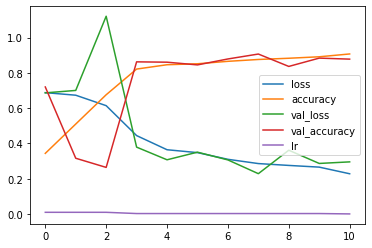

In [ ]:
pd.DataFrame(CNN_Model_SGD.history.history).plot()

In [ ]:
# Check the accuracy of CNN model

test_accu_CNN_SGD = CNN_Model_SGD.evaluate(test)
print('The testing accuracy is :',test_accu_CNN_SGD[1]*100, '%')

20/20 [==============================] - 15s 723ms/step - loss: 0.3375 - accuracy: 0.8558
The testing accuracy is : 85.57692170143127 %


In [ ]:
#Predicted values 
preds_SGD = CNN_Model_SGD.predict(test,verbose=1)

20/20 [==============================] - 21s 984ms/step


In [ ]:
pred_SGD = preds_SGD.copy()
pred_SGD[pred_SGD <= 0.5] = 0
pred_SGD[pred_SGD > 0.5] = 1

In [ ]:
# Confusion Matrix for CNN Model
cm_SGD = pd.DataFrame(data=confusion_matrix(test.classes, pred_SGD, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])

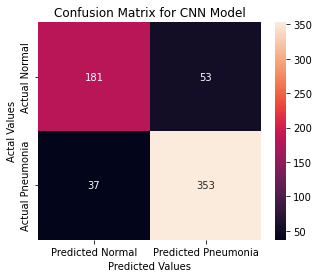

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_SGD,annot=True,fmt="d")
plt.title('Confusion Matrix for CNN Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(classification_report(y_true=test.classes,y_pred=pred_SGD,target_names =['NORMAL','PNEUMONIA']))

#print("MLP Error: %.2f%%" % (100 - score[1] * 100))

              precision    recall  f1-score   support

      NORMAL       0.83      0.77      0.80       234
   PNEUMONIA       0.87      0.91      0.89       390

    accuracy                           0.86       624
   macro avg       0.85      0.84      0.84       624
weighted avg       0.85      0.86      0.85       624



In [ ]:
# ROC AUC FOR CNN
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test.classes, pred_SGD)
print(f'ROC AUC (Test Dataset) {auc:.2}')

ROC AUC (Test Dataset) 0.84


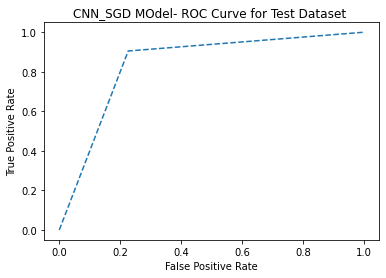

In [ ]:
# calculate roc curves
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test.classes, pred_SGD)

# plot the roc curve for the model
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN_SGD MOdel- ROC Curve for Test Dataset ')
plt.show()

(624, 224, 224, 3)
(624,)


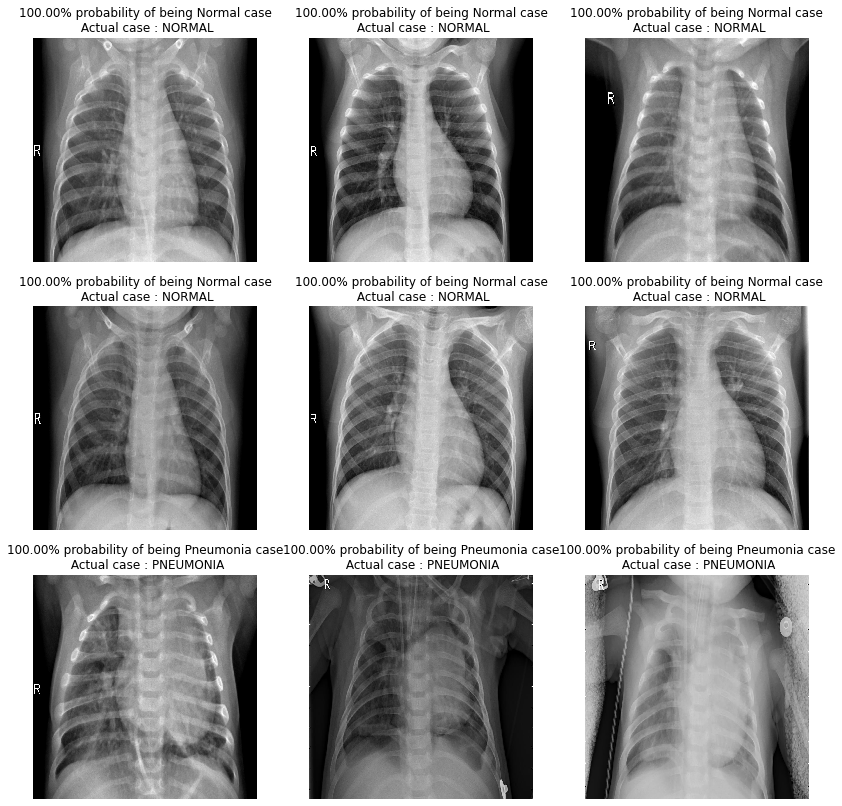

In [ ]:
# CORRECTLY PREDICTED VALUES FOR TEST DATA
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if pred_SGD[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(pred_SGD[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-pred_SGD[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()